In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('datasets/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)
X = df
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [7]:
X.shape, y.shape

((3333, 18), (3333,))

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size =0.3, random_state=17)

In [12]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 17)

tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
pred_holdout = tree.predict(X_holdout)

In [16]:
pred_holdout.shape, y_holdout.shape

((1000,), (1000,))

In [17]:
accuracy_score(y_holdout, pred_holdout)

0.92

In [20]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [50]:
from tqdm import tqdm_notebook

In [42]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)


In [53]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []

max_depth_values = np.arange(2, 11)
#for each value of max depth
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state=17, max_depth = curr_max_depth)
    #perform cross-validation
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    
    #assess the model with holdout set
    tree.fit(X_train, y_train)
    curr_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, curr_ho_pred))
    

Text(0.5, 1.0, 'Decision Tree curves for max_depth')

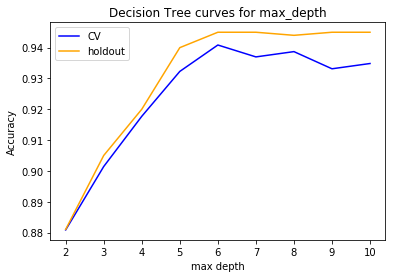

In [57]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree curves for max_depth')

In [46]:
val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)

In [47]:
val_scores.mean()

0.9331381937487938

In [26]:
#GridSearchCV for finding good combination of hyperparameters 
#StratifiedKFold is a way to describe cross-validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [27]:
#which parameters I will tune
params = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}

In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [31]:
best_tree = GridSearchCV(estimator = tree, param_grid = params, cv = skf, n_jobs = -1, verbose=1 )

In [32]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    9.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  

In [34]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [35]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

#### Cross-validation assessment

In [37]:
best_tree.best_score_

0.9404200600085727

#### Holdout assessment

In [38]:
pred_holdout_better = best_tree.predict(X_holdout)

In [39]:
accuracy_score(y_holdout, pred_holdout_better)

0.94

In [67]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from ipywidgets import Image

In [62]:
export_graphviz(best_tree.best_estimator_, out_file = 'tree.dot', filled=True, feature_names=X.columns)

In [68]:
dot_data = StringIO()
export_graphviz(best_tree.best_estimator_, out_file = dot_data, filled=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

InvocationException: GraphViz's executables not found